# Impoting Basic Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#!pip install pandas_profiling

# Importing Pandas Profiling Library

In [103]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
import pandas_profiling as pp

# Importing Pandas Display Library

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Reading the CSV file

In [5]:
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                   sep=',', 
                   names = ['age','workclass','fnlwgt','education','education-num','marital-status',
                            'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'] )

# Basic Info About the Data Set

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
class             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Some of the variables are not self-explanatory. The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents. The variable education_num stands for the number of years of education in total, which is a continuous representation of the discrete variable education. The variable relationship represents the responding unit’s role in the family.  capital_gain and capital_loss are income from investment sources other than wage/salary.

For simplicity of this analysis, the weighting factor is discarded. Total number of years of education can represent by the highest education level completed. Role in the family can be assessed from gender and marital status. Thus, the following 3 variables are deleted education,  relationship, and fnlwgt.

# A Comprehensive Explanation on Data Set, Very Helpful

In [8]:
pp.ProfileReport(df)

Number of variables,15
Number of observations,32561
Total Missing (%),0.0%
Total size in memory,3.7 MiB
Average record size in memory,120.0 B
Numeric,6
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Strip Command For the Object Columns

In [9]:
df = df.applymap(lambda x: x.strip() if type(x) is object else x)

# Describe Command to Check Basic Statistics 

In [10]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# Cleaning and Formatting The Column Names

In [11]:
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    if not rename_dict:
        return df.rename(columns={col: col.strip().lower().replace(' ','_').replace('-','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

In [12]:
cleanup_column_names(df)

In [13]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Class Column is Our Target Variable

In [14]:
df['class'].value_counts()

 <=50K    24720
 >50K      7841
Name: class, dtype: int64

In [15]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [16]:
df['class'] = df['class'].apply(lambda x: x.strip())

In [17]:
df['income'] = df['class'].apply(lambda x: 0 if x =='<=50K' else 1)

In [18]:
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [19]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [20]:
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [21]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [22]:
df['workclass'] = df['workclass'].apply(lambda x: x.strip())

In [23]:
df.drop(df.query('workclass == "?"').index, axis=0, inplace=True)

In [24]:
df['occupation'] = df['occupation'].apply(lambda x: x.strip())

In [25]:
df.drop(df.query('occupation == "?"').index, axis=0, inplace=True)

In [26]:
df['native_country'] = df['native_country'].apply(lambda x: x.strip())

In [27]:
df.drop(df.query('native_country == "?"').index, axis=0, inplace=True)

In [28]:
df.loc[:, df.dtypes == object]

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [29]:
#df.loc[:, df.dtypes == object] = df.loc[:, df.dtypes == object].fillna('')

In [30]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'income'],
      dtype='object')

# To Check the Specific Value in a Specific Type of Columns

In [31]:
for x in df.select_dtypes(include='object').columns:
    if df[x].value_counts().index.any() == '?':
        print (x)
    else:
        print ('No ?')

No ?
No ?
No ?
No ?
No ?
No ?
No ?
No ?
No ?


In [32]:
for x in df.select_dtypes(include='int').columns:
    if df[x].value_counts().index.any() == '?':
        print (x)
    else:
        print ('No ?')

No ?
No ?
No ?
No ?
No ?
No ?
No ?


In [33]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'income'],
      dtype='object')

# Visualization

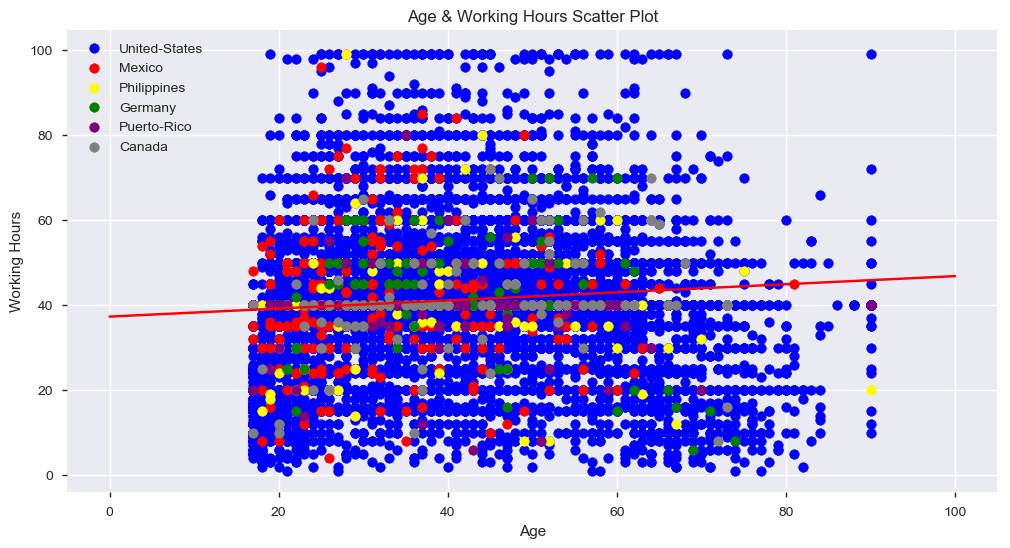

In [34]:
plt.figure(figsize = (12,6))
plt.scatter(df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].query('native_country =="United-States"').age, 
            df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].query('native_country =="United-States"').hours_per_week, c = 'blue')
plt.scatter(df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].query('native_country =="Mexico"').age, 
            df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].query('native_country =="Mexico"').hours_per_week, c = 'red')
plt.scatter(df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].query('native_country =="Philippines"').age, 
            df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].query('native_country =="Philippines"').hours_per_week, c = 'yellow')
plt.scatter(df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].query('native_country =="Germany"').age, 
            df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].query('native_country =="Germany"').hours_per_week, c = 'green')
plt.scatter(df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].query('native_country =="Puerto-Rico"').age, 
            df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].query('native_country =="Puerto-Rico"').hours_per_week, c = 'purple')
plt.scatter(df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].query('native_country =="Canada"').age, 
            df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].query('native_country =="Canada"').hours_per_week, c = 'gray')
plt.xlabel('Age')
plt.ylabel('Working Hours')
plt.title('Age & Working Hours Scatter Plot')
#plt.xlim(0,1000)
#plt.ylim(0,1000)
plt.legend(labels = ['United-States','Mexico','Philippines','Germany','Puerto-Rico','Canada'])
xm, ym = np.polyfit(df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].age, 
                df[df.native_country.isin(df.native_country.value_counts()[df.native_country.value_counts()>100].index.tolist())].hours_per_week, 1)
# Make theoretical line to plot
x = np.array([0,100])
y_m = xm * x + ym
# Add regression line to your plot
_ = plt.plot(x, y_m, color='red')

Text(0.5,1,'Native Country Average Working Hours Scatter Plot')

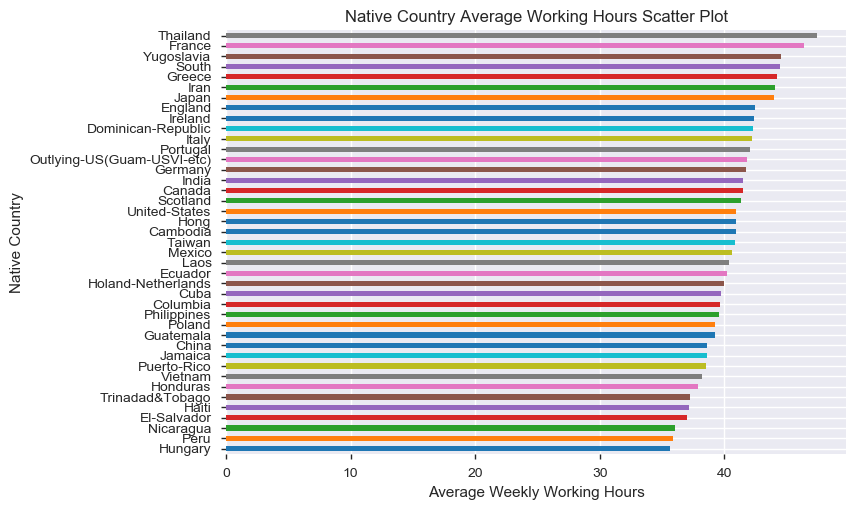

In [35]:
df.groupby('native_country').hours_per_week.mean().sort_values(ascending=True).plot.barh()
plt.xlabel('Average Weekly Working Hours')
plt.ylabel('Native Country')
plt.title('Native Country Average Working Hours Scatter Plot')

Text(0.5,1,'Native Country Average Age Scatter Plot')

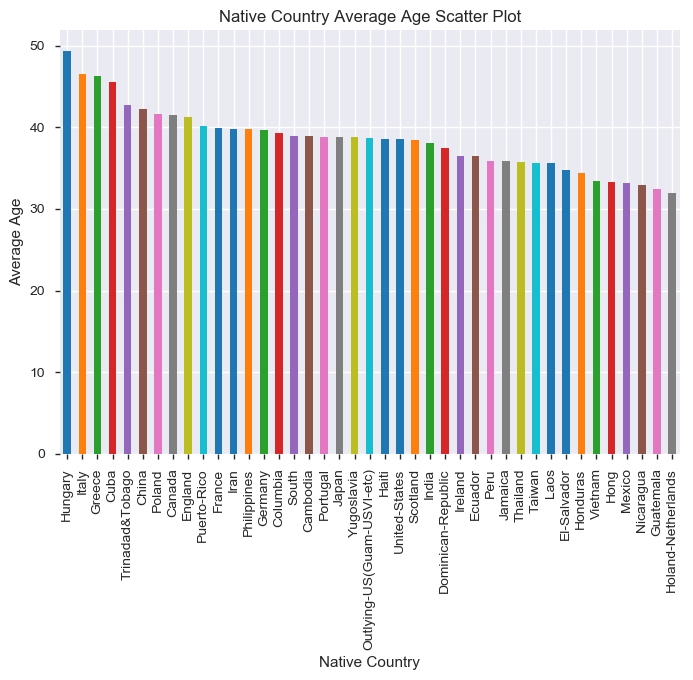

In [36]:
df.groupby('native_country').age.mean().sort_values(ascending=False).plot.bar()
plt.xlabel('Native Country')
plt.ylabel('Average Age')
plt.title('Native Country Average Age Scatter Plot')

Text(0.5,1,'Marital Status Based On Age and Weekly Working Hours')

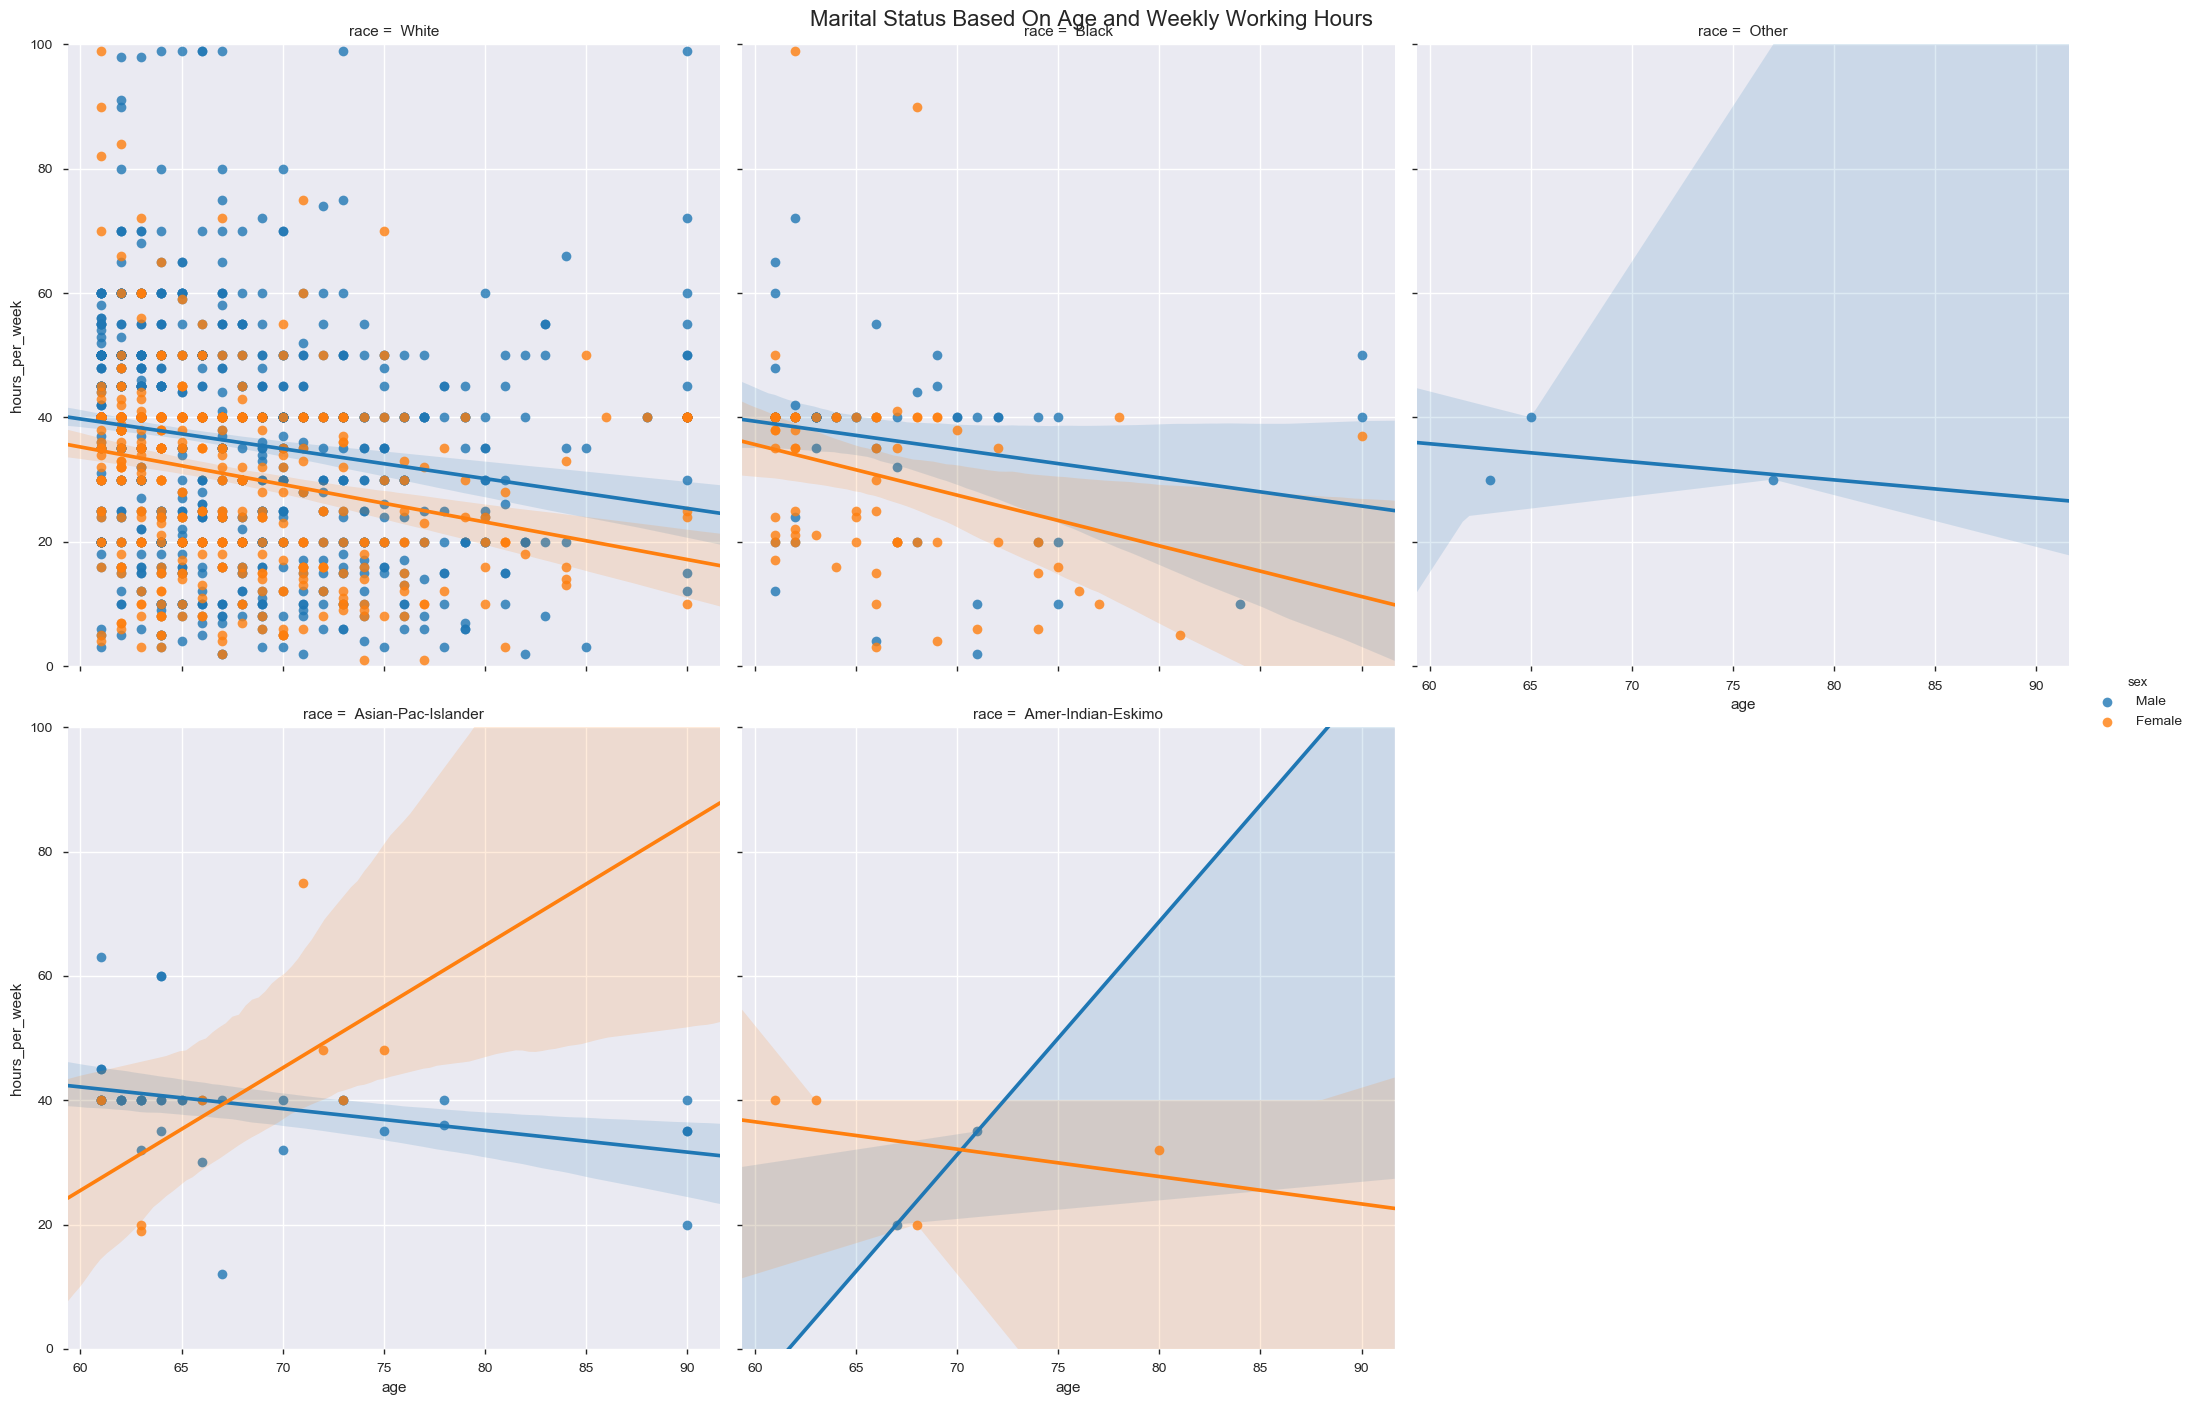

In [37]:
g = sns.lmplot(x="age", y="hours_per_week", data = df.query("age>60"), col="race", hue="sex", size=7, fit_reg=True,col_wrap=3)
g.axes[0].set_ylim((0,100))
plt.suptitle('Marital Status Based On Age and Weekly Working Hours', y = 1, fontsize = 16)


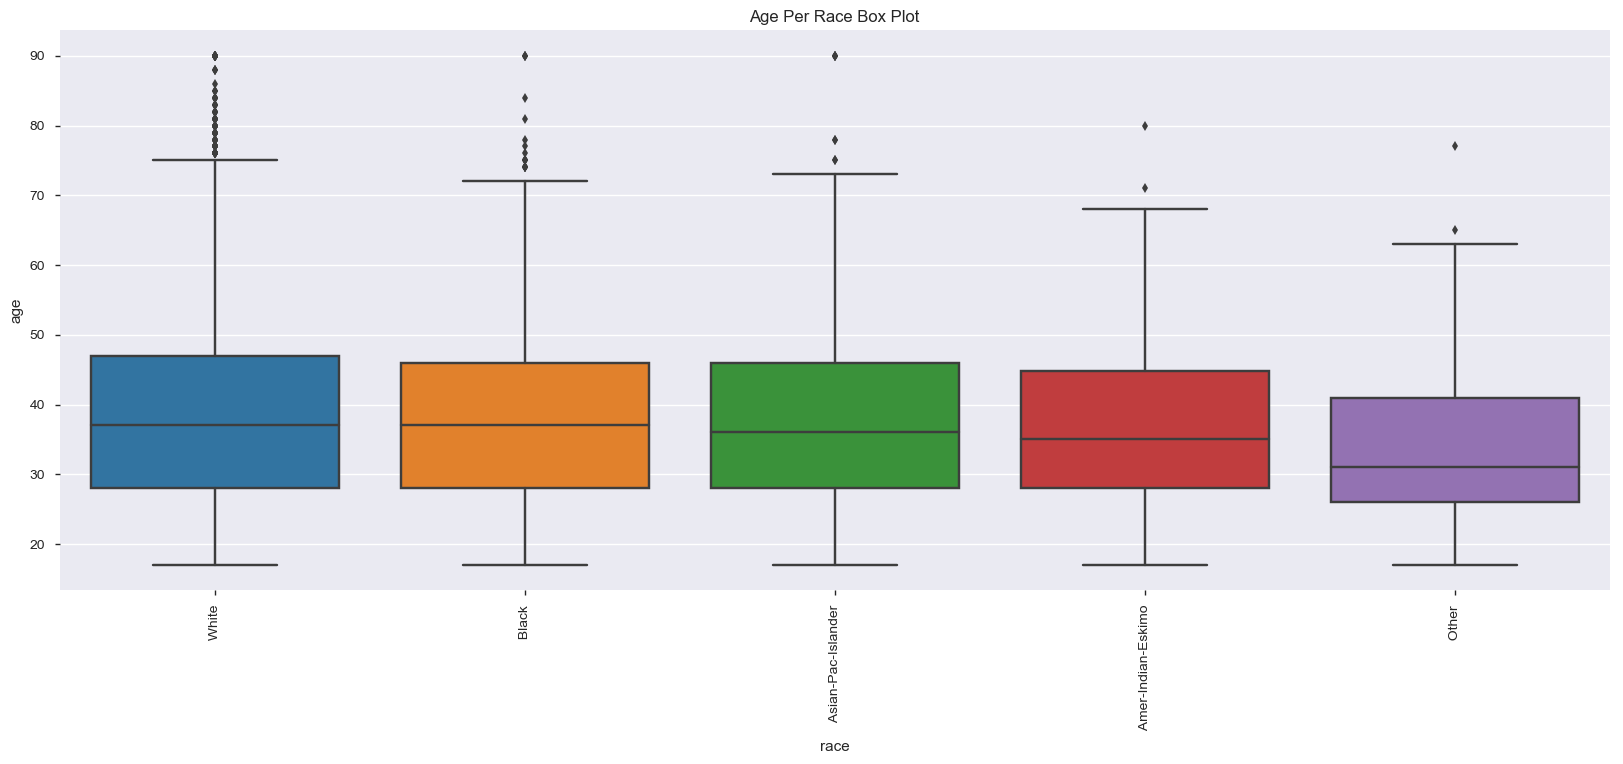

In [38]:
fig = plt.figure(figsize=(20, 16))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=90)
ax3 = sns.boxplot(x="race", y="age", data=df)
ax3 = plt.title('Age Per Race Box Plot')

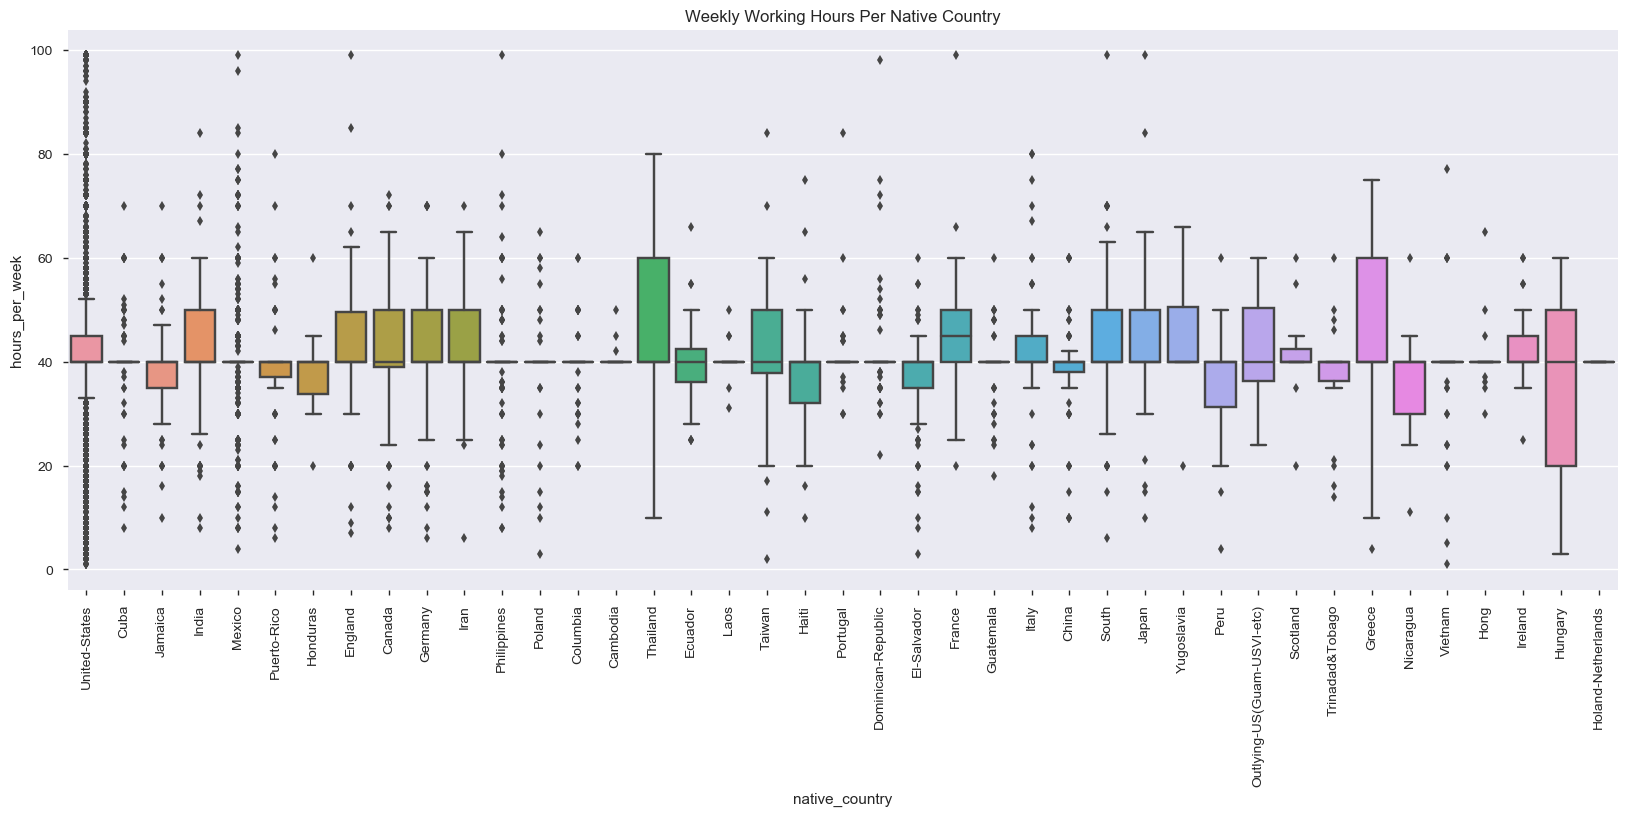

In [39]:
fig = plt.figure(figsize=(20, 16))

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=90)
ax3 = sns.boxplot(x="native_country", y="hours_per_week", data=df)
ax3 = plt.title('Weekly Working Hours Per Native Country')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


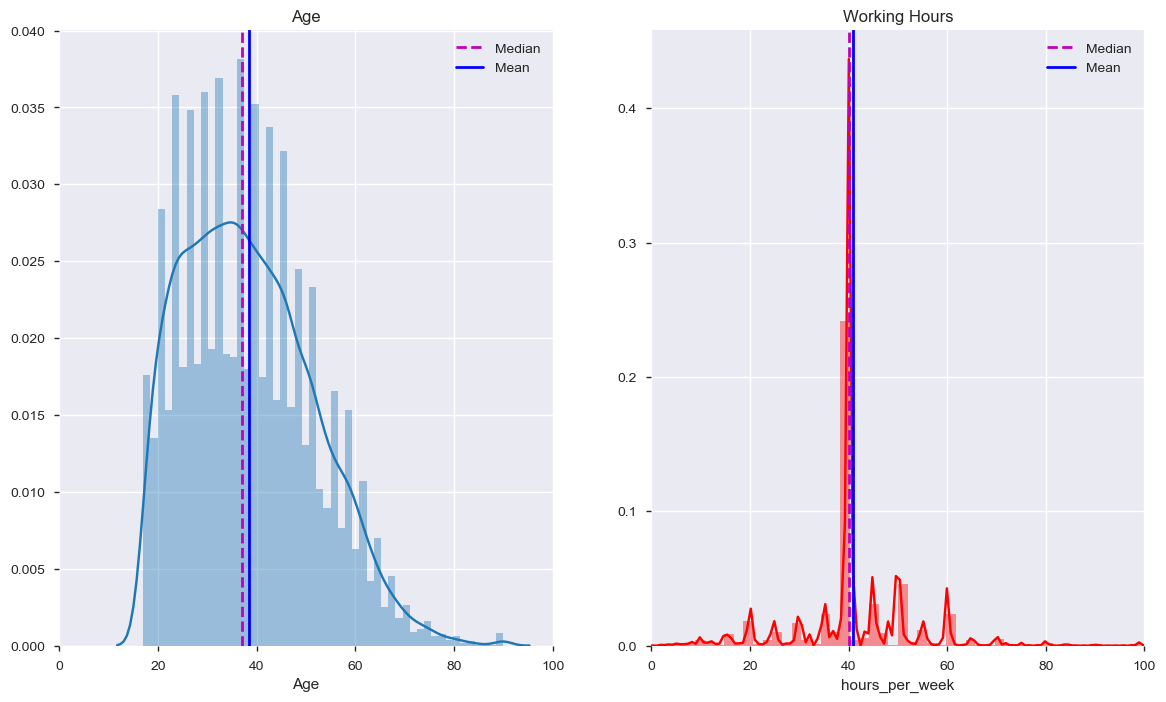

In [40]:
# Create a figure and axes. Then plot the data
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,
                               sharey=False, figsize=(14,8))
sns.distplot(df.age, ax=ax0)

# Customize the labels and limits
ax0.set(xlabel="Age", xlim=(0,100), title="Age")

# Add vertical lines for the median and mean
ax0.axvline(x= df.age.median(), color='m', label='Median', linestyle='--', linewidth=2)
ax0.axvline(x= df.age.mean(), color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax0.legend()

sns.distplot(df.hours_per_week, color = 'red', ax=ax1)

# Customize the labels and limits
ax1.set(xlabel="hours_per_week", xlim=(0,100), title="Working Hours")

# Add vertical lines for the median and mean
ax1.axvline(x= df.hours_per_week.median(), color='m', label='Median', linestyle='--', linewidth=2)
ax1.axvline(x= df.hours_per_week.mean(), color='b', label='Mean', linestyle='-', linewidth=2)
ax1.legend()
plt.show()

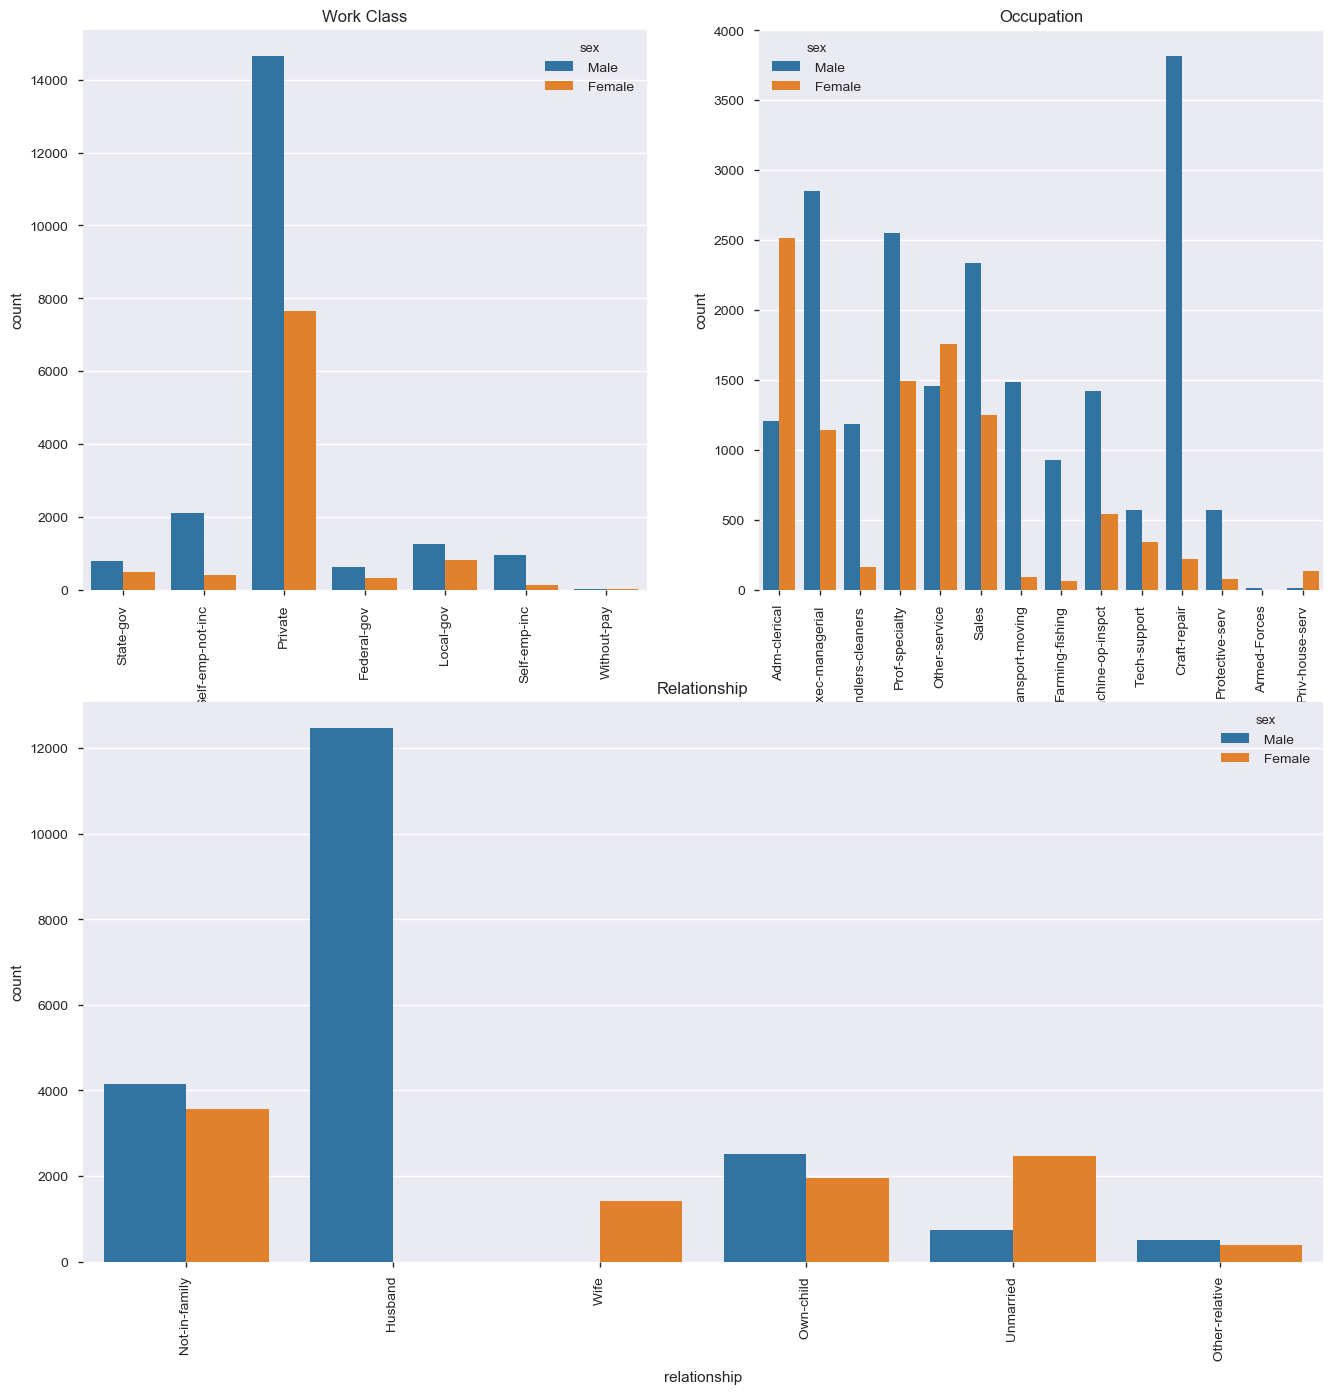

In [41]:
fig = plt.figure(figsize=(16, 16))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=90)
ax1 = sns.countplot(x = 'workclass', data = df, hue = 'sex')
ax1 = plt.title("Work Class")


ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=90)
ax2 = sns.countplot(x = 'occupation', data = df, hue = 'sex')
ax2 = plt.title("Occupation")


ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=90)
ax3 = sns.countplot(x = 'relationship', data = df, hue = 'sex')
ax3 = plt.title("Relationship")

Text(0.5,1,'Marital Status Per Age')

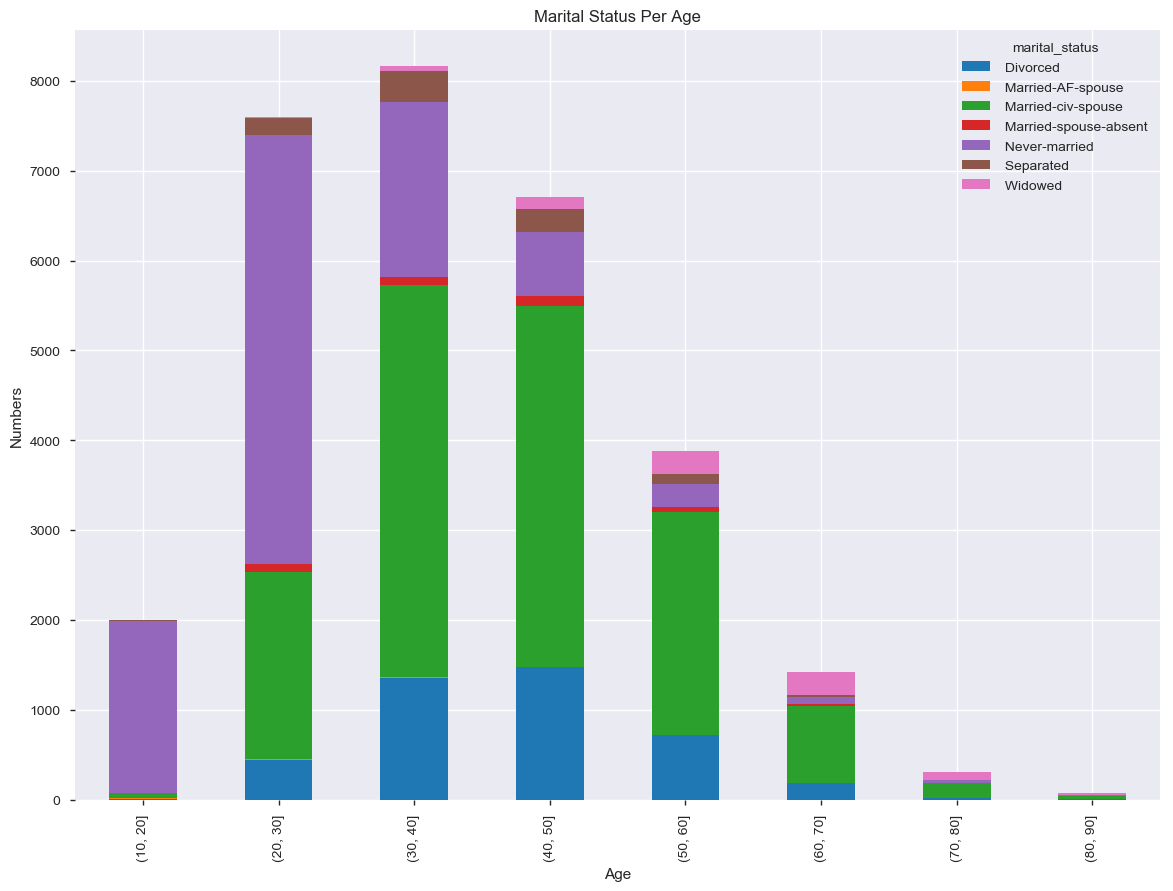

In [42]:
plt.rcParams["figure.figsize"] = (14,10)
df.groupby(['marital_status', 
        pd.cut(df.age, np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)
plt.ylabel('Numbers')
plt.xlabel('Age')
plt.title('Marital Status Per Age')

# Machine Learning

In [43]:
import itertools
## Regular Expression
import re

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from IPython.display import Image
## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [44]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'income'],
      dtype='object')

# Pd Get Dummies

In [45]:
#df = df[df.age < (df.age.mean() + 3*df.age.std())]

In [46]:
#df = df[df.hours_per_week < (df.hours_per_week.mean() + 3*df.hours_per_week.std())]

In [47]:
df1 = pd.get_dummies(df[['workclass', 'education', 'marital_status', 'occupation', 'relationship','race','sex','native_country']], drop_first=True)

In [48]:
df1.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y = df.income
X = pd.concat([df[['age','hours_per_week']], df1], axis= 1)

In [50]:
X.head()

,age,hours_per_week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_ 11th,education_ 12th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,40,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, stratify = y)

# Logistic Regression

In [52]:
logreg = LogisticRegression(solver='newton-cg',class_weight='balanced', C=1.0,n_jobs=-1, random_state=5)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_lr))

Accuracy : 0.7956504442381647


In [53]:
print(classification_report(y_test, logreg.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      5664
           1       0.56      0.86      0.68      1877

   micro avg       0.80      0.80      0.80      7541
   macro avg       0.75      0.82      0.76      7541
weighted avg       0.85      0.80      0.81      7541



Text(0.5,33.8611,'Predicted Label')

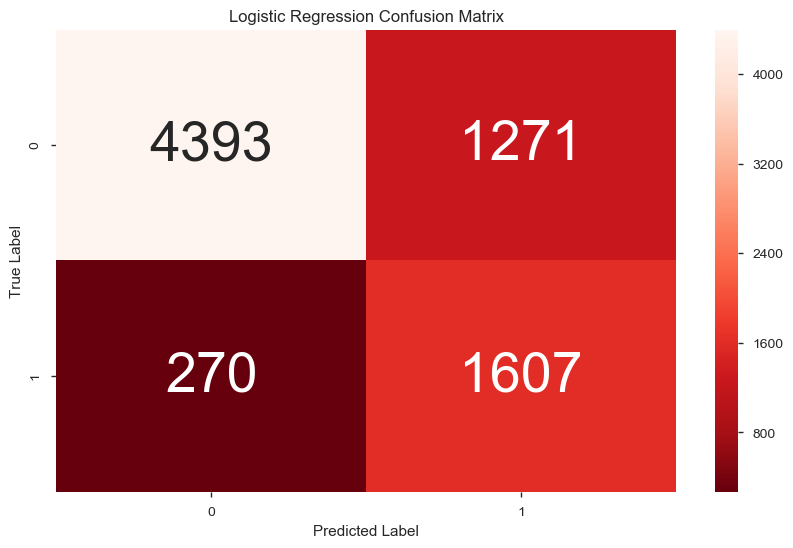

In [54]:
logreg_conf_mat = confusion_matrix(y_test, logreg.predict(X_test))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(logreg_conf_mat, annot=True, annot_kws={"size": 40},cmap=plt.cm.Reds_r, fmt='.0f', cbar = True)
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

In [55]:
from sklearn.model_selection import GridSearchCV
clf_l = GridSearchCV(LogisticRegression(random_state = 42), 
                   param_grid = {
                       'C': [0.001, 0.01, 0.1, 1, 10, 100], 
                       'penalty': ['l1','l2']}, 
                        cv=5)
clf_l = clf_l.fit(X_train, y_train)
print(accuracy_score(clf_l.predict(X_test), y_test))

0.8317199310436282


# XgBoost

In [56]:
import xgboost as xgb
from sklearn import metrics

def auc(m, X_train, X_test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(X_train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(X_test)[:,1]))

# Parameter Tuning
model = xgb.XGBClassifier()
param_dist = {"max_depth": [6,8,10],
              "min_child_weight" : [4,6,8],
              "n_estimators": [200],
              "learning_rate": [0.03,0.05, 0.1],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  67 out of  81 | elapsed:  3.9min remaining:   48.8s
[Parallel(n_jobs=-1)]: Done  76 out of  81 | elapsed:  4.3min remaining:   17.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.4min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=6, min_child_weight=8, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [57]:
model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=8, min_child_weight=6, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
model.fit(X_train,y_train)

auc(model, X_train, X_test)

(0.9156186654449759, 0.8929588100376549)

In [58]:
print(accuracy_score(model.predict(X_test), y_test))

0.8335764487468506


# Light Gradient Boosting

In [59]:
import lightgbm as lgb
from sklearn import metrics

def auc2(m, X_train, X_test): 
    return (metrics.roc_auc_score(y_train,m.predict(X_train)),
                            metrics.roc_auc_score(y_test,m.predict(X_test)))

lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed:   52.5s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   55.4s finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=25,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [60]:
model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=25,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=800, n_jobs=-1, num_leaves=300, objective=None,
        random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=False,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
model.fit(X_train,y_train)

auc(model, X_train, X_test)

(0.9637976897626639, 0.8869324227415428)

In [61]:
print(round(accuracy_score(model.predict(X_test), y_test),2))

0.83


# Cat Boosting

In [62]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [63]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'income'],
      dtype='object')

In [64]:
y = df.income
X = df.drop(['income','class'], axis=1)

In [65]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=33, stratify = y)

In [66]:
from catboost import CatBoostClassifier

In [67]:
clf = CatBoostClassifier(eval_metric="AUC",
                         one_hot_max_size=31,
                         depth=12, 
                         iterations= 1200, 
                         l2_leaf_reg= 7, 
                         learning_rate= 0.08,
                         od_type = 'Iter',
                         od_wait = 10,
                         thread_count=10,
                         rsm = 0.2,
                         metric_period = 20)

clf.fit(X_train,y_train, cat_features= categorical_features_indices)
auc(clf, X_train, X_test)

0:	total: 90.3ms	remaining: 1m 48s
20:	total: 8.32s	remaining: 7m 47s
40:	total: 14.3s	remaining: 6m 43s
60:	total: 18.5s	remaining: 5m 44s
80:	total: 24s	remaining: 5m 31s
100:	total: 28.9s	remaining: 5m 14s
120:	total: 33s	remaining: 4m 54s
140:	total: 37s	remaining: 4m 38s
160:	total: 45.2s	remaining: 4m 51s
180:	total: 54.3s	remaining: 5m 5s
200:	total: 1m 3s	remaining: 5m 16s
220:	total: 1m 13s	remaining: 5m 24s
240:	total: 1m 23s	remaining: 5m 32s
260:	total: 1m 34s	remaining: 5m 38s
280:	total: 1m 43s	remaining: 5m 39s
300:	total: 1m 54s	remaining: 5m 40s
320:	total: 2m 4s	remaining: 5m 39s
340:	total: 2m 14s	remaining: 5m 38s
360:	total: 2m 24s	remaining: 5m 36s
380:	total: 2m 33s	remaining: 5m 29s
400:	total: 2m 42s	remaining: 5m 24s
420:	total: 2m 53s	remaining: 5m 21s
440:	total: 3m 2s	remaining: 5m 13s
460:	total: 3m 11s	remaining: 5m 6s
480:	total: 3m 19s	remaining: 4m 58s
500:	total: 3m 28s	remaining: 4m 51s
520:	total: 3m 38s	remaining: 4m 44s
540:	total: 3m 47s	remainin

(0.9562012000763863, 0.9248501446316999)

In [68]:
auc(clf, X_train, X_test)

(0.9562012000763863, 0.9248501446316999)

In [69]:
print(round(accuracy_score(clf.predict(X_test), y_test),2))

0.87


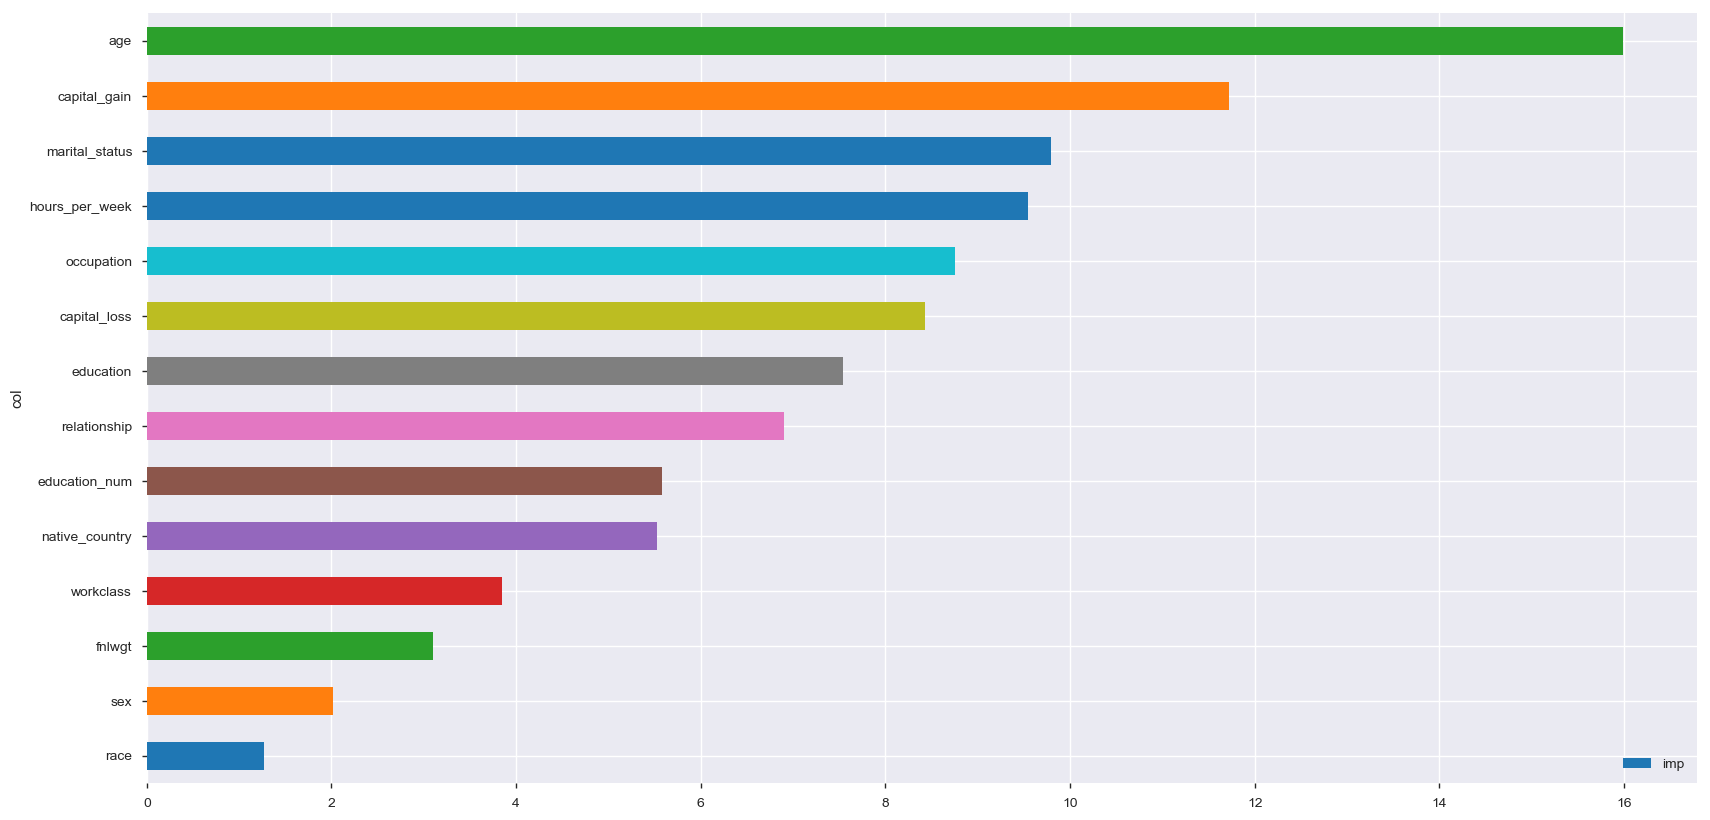

In [70]:
# Feature Importance
fea_imp = pd.DataFrame({'imp': clf.feature_importances_, 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))

# Second Approach (CatBoosting)

In [71]:
df1 = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                   sep=',', 
                   names = ['age','workclass','fnlwgt','education','education-num','marital-status',
                            'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'] )

In [72]:
df = df.applymap(lambda x: x.strip() if type(x) is object else x)

In [73]:
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    if not rename_dict:
        return df.rename(columns={col: col.strip().lower().replace(' ','_').replace('-','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

In [74]:
cleanup_column_names(df1)

In [75]:
df1['class'] = df1['class'].apply(lambda x: x.strip())

In [76]:
df1['income'] = df1['class'].apply(lambda x: 0 if x =='<=50K' else 1)

In [77]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [78]:
df1['workclass'] = df1['workclass'].apply(lambda x: x.strip())

In [79]:
df1.drop(df1.query('workclass == "?"').index, axis=0, inplace=True)

In [80]:
df1['occupation'] = df1['occupation'].apply(lambda x: x.strip())

In [81]:
df1.drop(df1.query('occupation == "?"').index, axis=0, inplace=True)

In [82]:
df1['native_country'] = df1['native_country'].apply(lambda x: x.strip())

In [83]:
df1.drop(df1.query('native_country == "?"').index, axis=0, inplace=True)

In [84]:
for x in df.select_dtypes(include='object').columns:
    if df[x].value_counts().index.any() == '?':
        print (x)
    else:
        print ('No ?')

No ?
No ?
No ?
No ?
No ?
No ?
No ?
No ?
No ?


In [85]:
for x in df.select_dtypes(include='int').columns:
    if df[x].value_counts().index.any() == '?':
        print (x)
    else:
        print ('No ?')

No ?
No ?
No ?
No ?
No ?
No ?
No ?


In [86]:
df1 = df1[df1.age < (df1.age.mean() + 3*df1.age.std())]

In [87]:
df1 = df1[df1.hours_per_week < (df1.hours_per_week.mean() + 3*df1.hours_per_week.std())]

In [88]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'income'],
      dtype='object')

In [89]:
y = df1.income
X = df1[['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]

In [90]:
from catboost import CatBoostClassifier

In [91]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=33, stratify = y)

In [98]:
clf = CatBoostClassifier(eval_metric="AUC",
                         one_hot_max_size=31,
                         depth=12, 
                         iterations= 1200, 
                         l2_leaf_reg= 7, 
                         learning_rate= 0.09,
                         od_type = 'Iter',
                         od_wait = 10,
                         thread_count=10,
                         rsm = 0.2,
                         metric_period = 20)

clf.fit(X_train,y_train, cat_features= categorical_features_indices)
auc(clf, X_train, X_test)

0:	total: 115ms	remaining: 2m 17s
20:	total: 6.47s	remaining: 6m 3s
40:	total: 11.8s	remaining: 5m 34s
60:	total: 15.8s	remaining: 4m 54s
80:	total: 17.9s	remaining: 4m 7s
100:	total: 21.7s	remaining: 3m 55s
120:	total: 23.4s	remaining: 3m 28s
140:	total: 29.7s	remaining: 3m 43s
160:	total: 38.9s	remaining: 4m 11s
180:	total: 49.8s	remaining: 4m 40s
200:	total: 59s	remaining: 4m 53s
220:	total: 1m 8s	remaining: 5m 2s
240:	total: 1m 15s	remaining: 5m
260:	total: 1m 23s	remaining: 5m 1s
280:	total: 1m 34s	remaining: 5m 9s
300:	total: 1m 43s	remaining: 5m 9s
320:	total: 1m 54s	remaining: 5m 13s
340:	total: 2m 2s	remaining: 5m 9s
360:	total: 2m 13s	remaining: 5m 9s
380:	total: 2m 20s	remaining: 5m 2s
400:	total: 2m 30s	remaining: 4m 59s
420:	total: 2m 39s	remaining: 4m 55s
440:	total: 2m 48s	remaining: 4m 50s
460:	total: 2m 58s	remaining: 4m 45s
480:	total: 3m 8s	remaining: 4m 42s
500:	total: 3m 17s	remaining: 4m 35s
520:	total: 3m 26s	remaining: 4m 28s
540:	total: 3m 35s	remaining: 4m 23s


Iteration with suspicious time -464 sec ignored in overall statistics.


840:	total: 5m 51s	remaining: 2m 30s
860:	total: 6m	remaining: 2m 22s
880:	total: 6m 10s	remaining: 2m 14s
900:	total: 6m 21s	remaining: 2m 6s
920:	total: 6m 29s	remaining: 1m 58s
940:	total: 6m 37s	remaining: 1m 49s
960:	total: 6m 46s	remaining: 1m 41s
980:	total: 6m 56s	remaining: 1m 32s
1000:	total: 7m 5s	remaining: 1m 24s
1020:	total: 7m 15s	remaining: 1m 16s
1040:	total: 7m 24s	remaining: 1m 7s
1060:	total: 7m 32s	remaining: 59.4s
1080:	total: 7m 42s	remaining: 51s
1100:	total: 7m 51s	remaining: 42.4s
1120:	total: 8m	remaining: 33.9s
1140:	total: 8m 8s	remaining: 25.3s
1160:	total: 8m 17s	remaining: 16.7s
1180:	total: 8m 26s	remaining: 8.16s
1199:	total: 8m 35s	remaining: 0us


(0.9431519276455318, 0.9307953053949521)

In [99]:
auc(clf, X_train, X_test)

(0.9431519276455318, 0.9307953053949521)

In [101]:
print(round(accuracy_score(clf.predict(X_test), y_test),2))

0.88


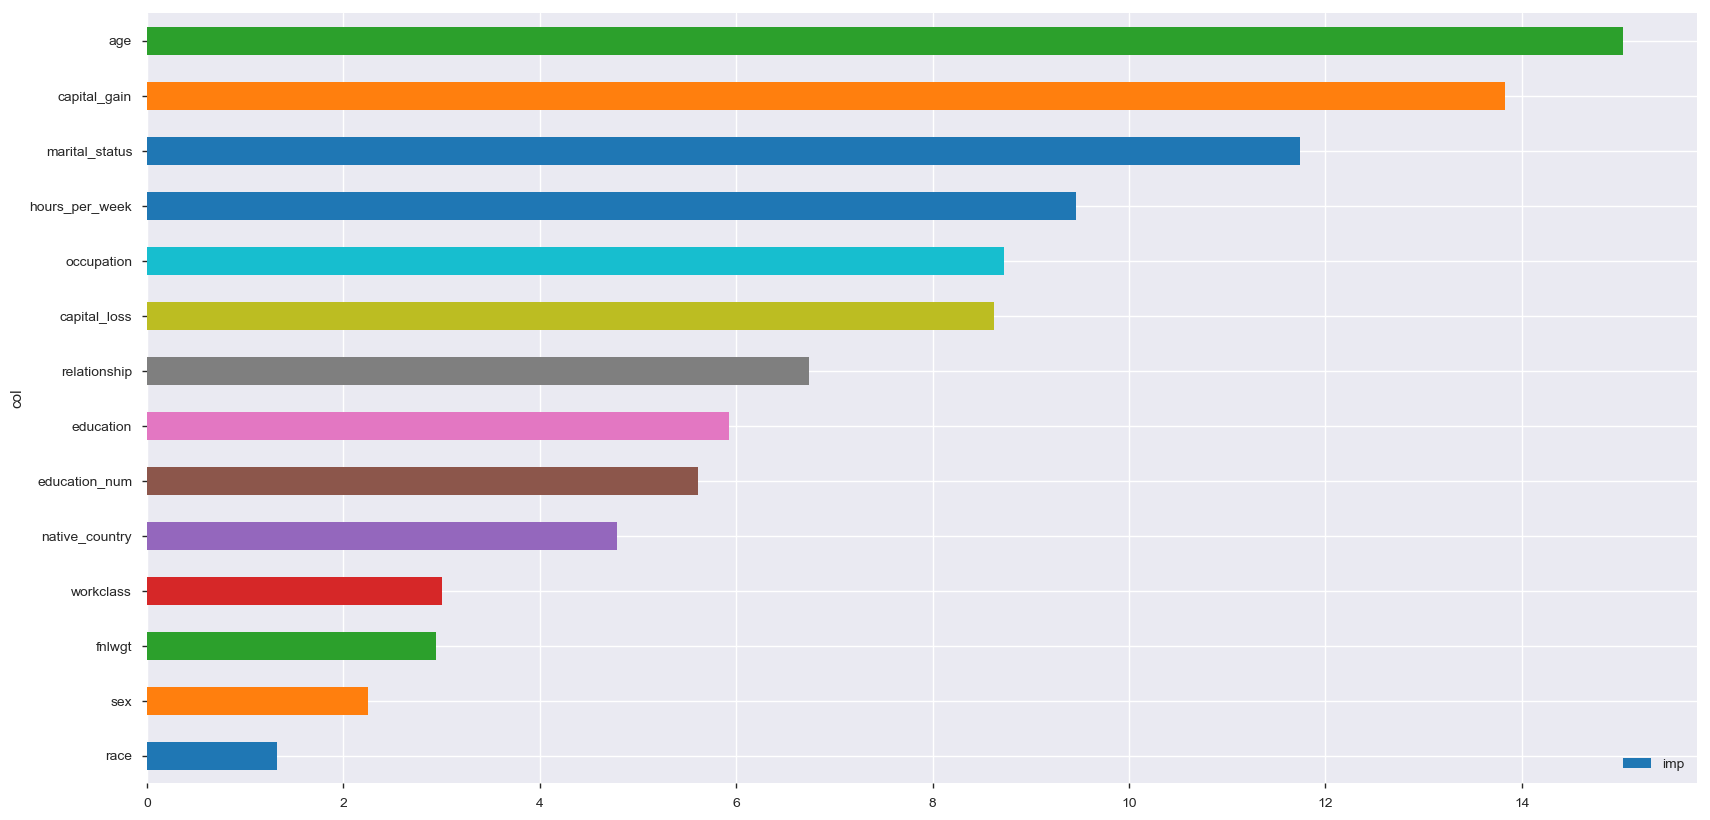

In [102]:
# Feature Importance
fea_imp = pd.DataFrame({'imp': clf.feature_importances_, 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))